In [206]:
import numpy as np
from scipy import stats

def ridge(X,Y,lamb):
    
#     """"
#     find out proper linear transformation from X to Y using ridge regression.
    
#     - loss function : ||Y-XB||_2 + lamb*||B||_2
#     ===========================================
#     - Input:
#     X : m by n array
#     Y : length m vector array
#     lamb : float
    
#     - Output:
#     B : length n vector array
#     ===========================================
#     """"
    
    # Normalization
    X = stats.zscore(X, axis=0, ddof=1)
    X = np.matrix(X).T
    Y = np.matrix(Y).T
    Y_m = np.mean(Y)
    print(Y_m)
    Y = Y - Y_m
    print(X.shape)
    # calculating B
    print(X.T@Y)
    
    B = np.linalg.inv(X.T@X +lamb*np.identity(X.shape[1]))*X.T@Y
    
    # Singular value decomposition : X = UDV'
#     U,D,Vt = np.linalg.svd(X)
#     V = Vt.T
    
    return Y_, B

In [187]:
import pandas as pd
archive =pd.read_csv('archive.csv')

In [7]:
co2 = archive['Carbon Dioxide (ppm)']

In [18]:
co2 = co2.dropna()

In [19]:
x = co2.index

In [20]:
x

Int64Index([  2,   3,   4,   6,   7,   8,  10,  11,  12,  13,
            ...
            700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
           dtype='int64', length=703)

In [22]:
y = np.array(co2)

In [23]:
len(x)

703

In [24]:
len(y)

703

In [76]:
np.mean(y)

352.3756330014225

In [77]:
80/700

0.11428571428571428

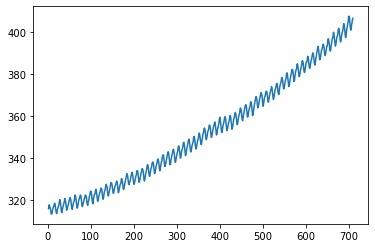

In [68]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [164]:
np.matrix(x[:500]).shape

(1, 500)

In [215]:
x_z = stats.zscore(x[:500], axis=0, ddof=1)

In [217]:
Y_,B = ridge(x[:500],y[:500],1)

338.5888
(500, 1)
[[7982.17375969]]


In [212]:
np.matrix(x[:500]).T.shape

(500, 1)

In [214]:
np.matrix(x_z[:500])@np.matrix(x_[:500]).T

matrix([[43296304]])

In [208]:
0.001*7982

7.982

In [191]:
B

matrix([[13.32583265]])

In [196]:
x

Int64Index([  2,   3,   4,   6,   7,   8,  10,  11,  12,  13,
            ...
            700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
           dtype='int64', length=703)

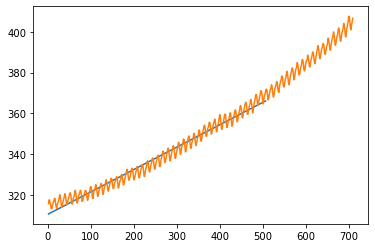

In [218]:
plt.plot(x[:500],B[0,0]*x_z[:500]+np.mean(y[:500]))
plt.plot(x,y)

In [94]:
B

79.82173759692998

In [114]:
from sklearn import linear_model

In [183]:
clf = linear_model.Ridge(alpha=1)

In [124]:
np.array(x[:500]).reshape(-1,1)

array([[  2],
       [  3],
       [  4],
       [  6],
       [  7],
       [  8],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 76],
       [ 77],
      

In [130]:
np.mean(y[:500])

338.5888

In [184]:
clf.fit(np.array(x[:500]).reshape(-1,1),y[:500])

Ridge(alpha=1)

In [185]:
clf.coef_

array([0.11021762])

In [127]:
clf.intercept_

310.36559364821596

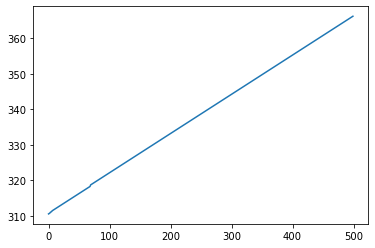

In [132]:
plt.plot(x[:500]*clf.coef_+clf.intercept_)

In [138]:
ridge(np.array(x[:500]).T,y[:500],1)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional